## **Image Segmentation**

A tutorial on convolutional neural networks that are able to split an image into chunks that are each classified according to a certain label corresponding to what is depicted: house, window, tree etc. They do so by producing an image where RGB pixels are replaced with class masks
Reference: https://pixellib.readthedocs.io/en/latest/image_ade20k.html

**Part 1: ADE20k** ✋

Install required package versions. In order to use PixelLib, we need to specify the version of TensorFlow

Install required packages. Watch out for messages from pixellib - install only once and reload the runtime once done. you can do that by foing to Runtime -> Restart Runtime. If Pixellib still throws errors, try again.

In [12]:

import numpy as np
# np.dict = dict
# np.object = object
# np.bool = bool
# np.int = int
# np.typeDict = dict
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import pixellib, ast, webcolors
import tensorflow as tf
import pandas as pd
import glob
import geopandas as gpd
import fiona


In [13]:

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.13.0


In [14]:
# Take the path from this output, e.g. /Users/feliksmitish/AI-project/.conda/lib/python3.8/site-packages/pixellib/__init__.py , and replace __init__.py with semantic/deeplab.py
# In it replace 'from tensorflow.python.keras.layers import BatchNormalization' with 'from tensorflow.keras.layers import BatchNormalization'
# also you need to replace ALL tensorflow.python.keras with tensorflow.keras exept for from tensorflow.python.keras.utils.layer_utils import get_source_inputs
# That will fix that error
print(pixellib)

<module 'pixellib' from '/Users/feliksmitish/AI-project/.conda/lib/python3.8/site-packages/pixellib/__init__.py'>


In [15]:
from pixellib.semantic import semantic_segmentation


#### Connect your Google Drive ✉

Set Up PixelLib and Load ADE20K Model ✴

Like in Demo3, this model is already defined by the PixelLib package, and its trained weights are loaded from a file.

In [16]:
segment_image = semantic_segmentation()
segment_image.load_ade20k_model("models/deeplabv3_xception65_ade20k.h5") # load network weights

Explore a sample image

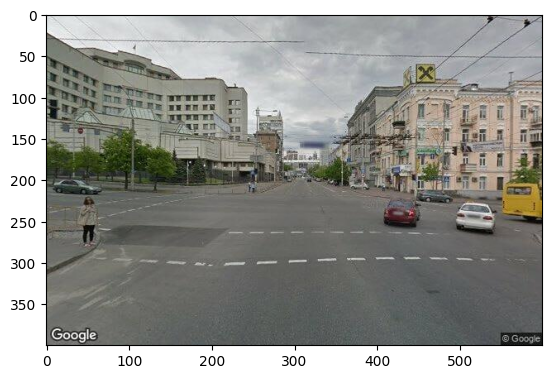

In [17]:
sample_image_path = "data/test.jpg"
sample_image = plt.imread(sample_image_path)
plt.imshow(sample_image)

Run PixelLib on a specific image from a file directory

1/1 [==============================] - 1s 1s/step


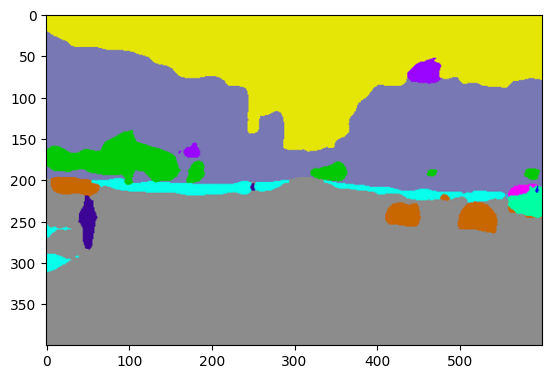

In [28]:
segvalues, segoverlay = segment_image.segmentAsAde20k(sample_image_path, overlay = False) # run segmenation and extract data
plt.imshow(segoverlay)
plt.imsave('data/test_output.jpg', segoverlay) 
plt.show()

Try with your own image!

Display Parsed Image Labels ⚡

In [29]:
segvalues

{'class_ids': [7, 2, 3, 5, 12, 21, 44, 103, 13, 81, 84, 33],
 'class_names': ['road',
  'building',
  'sky',
  'tree',
  'sidewalk',
  'car',
  'signboard',
  'van',
  'person',
  'bus',
  'truck',
  'fence'],
 'class_colors': [array([140, 140, 140]),
  array([180, 120, 120]),
  array([  6, 230, 230]),
  array([  4, 200,   3]),
  array([235, 255,   7]),
  array([  0, 102, 200]),
  array([255,   5, 153]),
  array([163, 255,   0]),
  array([150,   5,  61]),
  array([255,   0, 245]),
  array([255,   0,  20]),
  array([255, 184,   6])],
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'ratios': [44.00602547653959,
  26.5258431085044,
  21.389296187683286,
  2.9554618768328447,


Document classes in a Dataframe ⚡

This code tells you how to sum up your results in a nice readable dataframe

In [30]:
segvalues_dataframe = pd.DataFrame( # create a format for the dataframe to store class values and information about them
    {
        "class names": segvalues['class_names'],
        "ratios,%": segvalues['ratios'],
        "class ids": segvalues['class_ids'],
        "class colors": segvalues['class_colors'],
        "colors": '',
    }
)
segvalues_dataframe

,class names,"ratios,%",class ids,class colors,colors
0,road,44.006025,7,"[140, 140, 140]",
1,building,26.525843,2,"[180, 120, 120]",
2,sky,21.389296,3,"[6, 230, 230]",
3,tree,2.955462,5,"[4, 200, 3]",
4,sidewalk,2.119227,12,"[235, 255, 7]",
5,car,1.517252,21,"[0, 102, 200]",
6,signboard,0.498305,44,"[255, 5, 153]",
7,van,0.459929,103,"[163, 255, 0]",
8,person,0.394062,13,"[150, 5, 61]",
9,bus,0.121999,81,"[255, 0, 245]",


In [31]:
# this is a function that extracts class colors and visualizes them in dataframe cells.

def color_specific_cell(x):

    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    for i in range(len(df1)):
      color = 'background-color: '+str(webcolors.rgb_to_hex(tuple((segvalues_dataframe.iloc[i, 3])[::-1])))
      df1.iloc[i, 4] = color

    return df1

segvalues_dataframe.style.apply(color_specific_cell, axis=None)

,class names,"ratios,%",class ids,class colors,colors
0,road,44.006025,7,[140 140 140],
1,building,26.525843,2,[180 120 120],
2,sky,21.389296,3,[ 6 230 230],
3,tree,2.955462,5,[ 4 200 3],
4,sidewalk,2.119227,12,[235 255 7],
5,car,1.517252,21,[ 0 102 200],
6,signboard,0.498305,44,[255 5 153],
7,van,0.459929,103,[163 255 0],
8,person,0.394062,13,[150 5 61],
9,bus,0.121999,81,[255 0 245],


In [22]:
transposed = segvalues_dataframe.set_index('class names')
transposed = transposed.drop(columns=['class colors', 'colors', 'class ids'])
transposed = transposed.transpose().reset_index(drop=True)
transposed['panoID']='bENPZrCpo1ukiP7A5ks64A'
transposed = transposed.set_index('panoID')
transposed

class names,road,building,sky,tree,sidewalk,car,signboard,van,person,bus,truck,fence
panoID,,,,,,,,,,,,
bENPZrCpo1ukiP7A5ks64A,44.006025,26.525843,21.389296,2.955462,2.119227,1.517252,0.498305,0.459929,0.394062,0.121999,0.008591,0.004009


In [32]:
panoidDF = pd.read_pickle("/content/drive/My Drive/Data Analysis_Personal practice/visual_ai/gsv_data_soloma/panoid.p")
image_meta = panoidDF[panoidDF['panoID']=='bENPZrCpo1ukiP7A5ks64A']
image_meta = image_meta.set_index('panoID')
image_meta

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Data Analysis_Personal practice/visual_ai/gsv_data_soloma/panoid.p'

In [ ]:
joint_data = image_meta.join(transposed)
joint_data

: 

## We first did this segmentation for one semple.
## Now we'll do it for the whole metadata.

In [ ]:
panoidDF = pd.read_pickle("/content/drive/My Drive/Data Analysis_Personal practice/visual_ai/gsv_data_soloma/panoid.p")
# panoidDF = panoidDF[0:1]
panoidDF

: 

In [ ]:
classified_panoidDF = pd.DataFrame(
    {
        'date':[],
        'lat':[],
        'lon':[],
        'road':[],
        'tree':[],
        'building':[],
        'car':[],
        'sky':[],
        'grass':[],
        'stairs':[],
        'sidewalk':[],
        'person':[],
        'pole':[],
        'fence':[],
        'streetlight':[],
        'plant':[],
        'base':[]
     })

for index, meta in panoidDF.iterrows():
  for pano_angle in [0,90, 180, 270]:
    # million coda
    image_path = f"/content/drive/My Drive/Data Analysis_Personal practice/visual_ai/gsv_data_soloma/img/{meta['panoID']}_{pano_angle}.png"
    image = plt.imread(image_path)
    segvalues, segoverlay = segment_image.segmentAsAde20k(image_path, overlay = False) # run segmenation and extract data
    segvalues_dataframe = pd.DataFrame( # create a format for the dataframe to store class values and information about them
      {
          "ratios,%": segvalues['ratios'],
          "class names": segvalues['class_names']
      }
    )
    transposed = segvalues_dataframe.set_index('class names')
    transposed = transposed.transpose().reset_index(drop=True)
    transposed['panoID']=f"{meta['panoID']}_{pano_angle}"
    transposed = transposed.set_index('panoID')

    meta_frame = pd.DataFrame([{
          'date': meta['date'],
          'panoID': f"{meta['panoID']}_{pano_angle}",
          'lat': meta['lat'],
          'lon': meta['lon'],
      }])
    meta_frame = meta_frame.set_index('panoID')
    new_row = meta_frame.join(transposed)
    classified_panoidDF = pd.concat([
        classified_panoidDF,
        new_row
    ])
classified_panoidDF.head()

: 

In [ ]:
classified_panoidDF = classified_panoidDF.replace(np.nan,0)
classified_panoidDF.head()

: 

In [ ]:
integers_class = classified_panoidDF
# Converting all floats in the DF to integers
float_cols = integers_class.select_dtypes(include=['float64'])
for col in float_cols.columns.values:
  if 'lat' == col:
    print()
  elif 'lon' == col:
    print()
  else:
   integers_class[col] = integers_class[col].astype('int64')

integers_class

: 

In [ ]:
# Converting DF to GeoDF
integers_class_gdf = gpd.GeoDataFrame(
    integers_class, geometry=gpd.points_from_xy(integers_class['lon'], integers_class['lat'])
)

integers_class_gdf.index.name = 'id'
integers_class_gdf.head()

: 

In [ ]:
fiona.supported_drivers

: 

In [ ]:
integers_class_gdf.to_file("/content/drive/My Drive/Data Analysis_Personal practice/visual_ai/gsv_data_soloma/classifiedDF.geojson", driver='GeoJSON')

: 

In [ ]:
!python --version


Python 3.9.16


: 